In [1]:
### Data Manipulation
import numpy as np
from  numpy  import *
from numpy.random import standard_normal
import pandas as pd

### Plot Tools
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Random Nummer
import random
random.seed(1000)


### Math and Statistic Moduls
import statistics 
from scipy.stats import norm

## The Rendleman and Bartter Model

### Simulation intrest rate

In [2]:
## Parameters Model - Intrest Rate
r0 = 0.00112 #initial intrest rate
t = 78 #time to maturity in months

T = t/12 # Time to maturity in years
sig = sqrt(0.018393) # calculated in excel
mu = -0.13036 

## Parameters Simulation
I = 1000000 # simulation paths
M = 78 # simulation steps
dt = T/78 #length of time interval
df = exp(-mu*dt) #dicount factor per time interval


In [3]:
r = np.zeros((M+1,I),"d")
r[0,:] = r0

In [4]:
for i in range(1,M+1,1):
    ran = standard_normal(I)
    r[i,:] = r[i-1,:]*exp((mu-sig**2/2)*dt+sig*ran*sqrt(dt))

In [5]:
intrest = pd.DataFrame(r)
intrest["mean"]= intrest.mean(axis = 1)

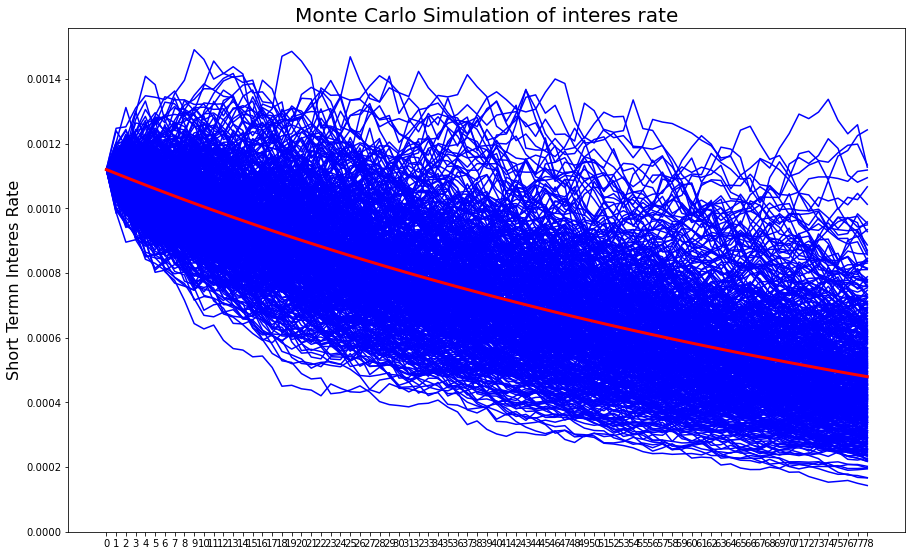

In [6]:
fig,ax = plt.subplots(figsize= (15,15*0.618))
plt.plot(intrest.iloc[:,0:500], c = "blue",zorder=0)
plt.plot(range(M+1),intrest["mean"], zorder=10, c = "r",linewidth=3)
plt.xticks(ticks=intrest.index)
plt.ylim(ymin=0)
plt.ylabel('Short Termn Interes Rate',fontsize=16)
plt.title("Monte Carlo Simulation of interes rate", fontsize=20);
plt.savefig('MonteCarlo_Short_interest.png');

### Bond price (plain vanilla)

In [7]:
FV = 100 #Face-Value
c = 0.0172 # Coupon rate
C = FV*c # Coupon

In [8]:
b = np.zeros((M+1,I),"d")
b[M,:] = FV

In [9]:
for i in range(M-1,-1,-1):
    if (i-(M%12))%12 == 0 :
        b[i,:] = (b[i+1,:]+C)*(1/(1+r[i+1])**dt)
    else:
        b[i,:] = (b[i+1,:])*(1/(1+r[i+1])**dt)

In [10]:
Bond = pd.DataFrame(b)

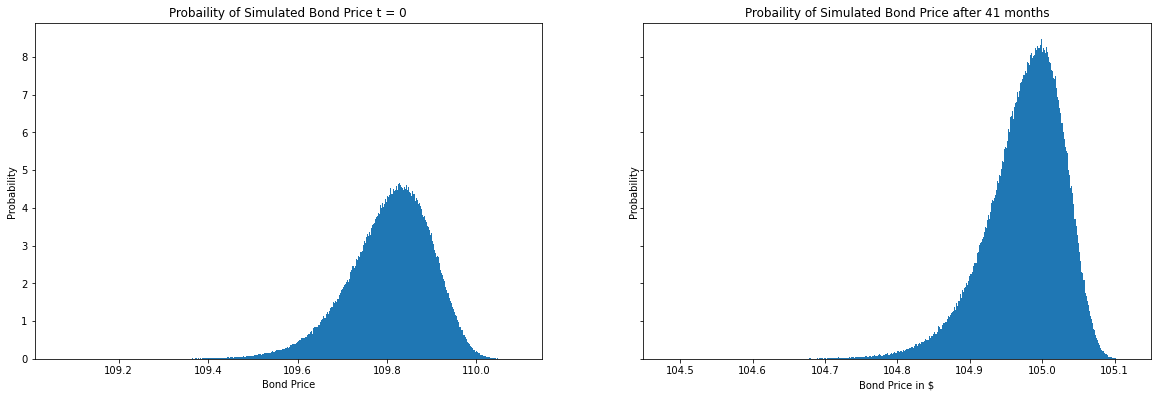

In [11]:
fig,sp = plt.subplots(1,2,figsize= (20,10*0.618),sharey=True)
sp[0].hist(Bond.loc[0], density=True, bins=1000) 
sp[0].set_ylabel('Probability')
sp[0].set_xlabel('Bond Price');
sp[0].set_title("Probaility of Simulated Bond Price t = 0");
sp[1].hist(Bond.loc[41], density=True, bins=1000) 
sp[1].set_ylabel('Probability')
sp[1].set_xlabel('Bond Price in $');
sp[1].set_title("Probaility of Simulated Bond Price after 41 months");
plt.savefig('Bond_price.png');

### Bond price (callable)

In [12]:
cp = 1.0685 
X = FV * cp # call price
cb = np.zeros((M+1,I),"d")
cb[M,:] = FV

In [13]:
for i in range(M-1,-1,-1):
    if (i-(M%12))%12 == 0 :
        cb[i,:] = (cb[i+1,:]+C)*(1/(1+r[i+1])**dt)
    else:
        cb[i,:] = (cb[i+1,:])*(1/(1+r[i+1])**dt)
        if i == 41:
            for j in range(I):
                if cb[i,j] >= X:
                    cb[i,j] = X
                

In [14]:
Call_Bond = pd.DataFrame(cb)

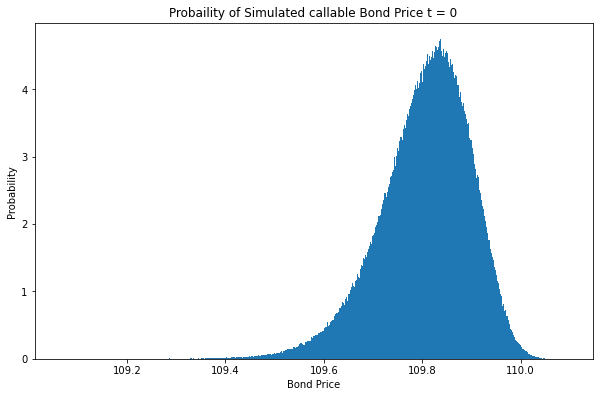

In [15]:
fig,sp = plt.subplots(1,1,figsize= (10,10*0.618),sharey=True)#
sp.hist(Call_Bond.loc[0], density=True, bins=1000) 
sp.set_ylabel('Probability')
sp.set_xlabel('Bond Price');
sp.set_title("Probaility of Simulated callable Bond Price t = 0");

### Simulation stock price

In [41]:
## Parameters Stock
S0 = 1
sig_s = np.sqrt(0.0001595986)

t = 30 #time to maturity in months
T = t/365 # Time to maturity in years
mu = 0


## Parameters Simulation
I = 1000000 # simulation paths
M = 30 # simulation steps
dt = T/30 #length of time interval
df = np.exp(-mu*dt) #dicount factor per time interval

In [42]:
s = np.zeros((M+1,I),"d")
s[0,:] = S0

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.00099027, 1.00032487, 1.00008541, ..., 1.00138891, 1.000389  ,
        1.00020912],
       [0.99990163, 1.00190124, 1.0008416 , ..., 1.0013433 , 1.00043794,
        0.99909084],
       ...,
       [0.99959192, 1.00158608, 1.00101788, ..., 1.0060797 , 1.00276244,
        1.00002452],
       [0.99986961, 1.00097057, 0.99979916, ..., 1.00581271, 1.00206957,
        1.0004446 ],
       [0.9994127 , 1.00065692, 0.99944673, ..., 1.00672609, 1.00226267,
        1.00037822]])

In [51]:
for i in range(1,M+1,1):
    ran = standard_normal(I)
    s[i,:] = s[i-1,:]*np.exp((r[i-1,:]-(sig_s**2)/2)*dt+sig_s*ran*np.sqrt(dt))

Stock = pd.DataFrame(s)
Stock["mean"] = Stock.mean(axis = 1)

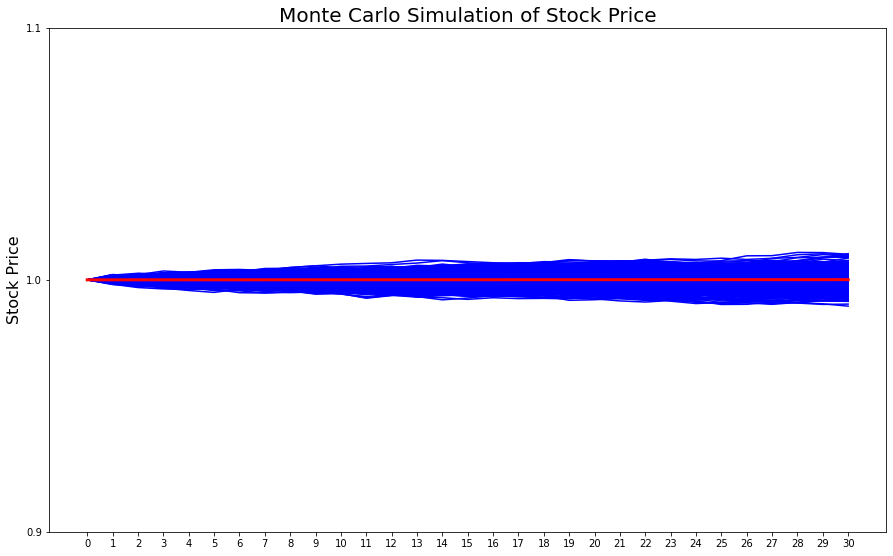

In [49]:
fig,ax = plt.subplots(figsize= (15,15*0.618))
plt.plot(Stock.iloc[:,0:500], c = "blue",zorder=0)
plt.plot(range(M+1),Stock["mean"], zorder=10, c = "r",linewidth=3)
plt.xticks(ticks=Stock.index)
plt.yticks(ticks = [0.9,1,1.1])
plt.ylabel('Stock Price',fontsize=16)
plt.title("Monte Carlo Simulation of Stock Price", fontsize=20);
plt.savefig('MonteCarlo_Stock_Price.png');